In [13]:
import numpy as np
import cv2 as cv2
from scipy import signal
import matplotlib.pyplot as plt
from visualize_flow import flow_to_color
import time
import pims
from numpy import linalg as LA
import os, os.path
from binary_tree import *

In [14]:
directory = "D:\\Informatica\\2020-2021\\COMPUTATIONAL VISION - 90539\\Progetto_2\\projections\\"

projections = []
for name in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, name)):
        projections.append(np.load(os.path.join(directory, name)))
#         print(name)
# data_003 = np.load('projections/allfilters_003.npy')
# data_004 = np.load('projections/allfilters_004.npy')

In [15]:
print(projections[0].shape)

(144, 180, 64)


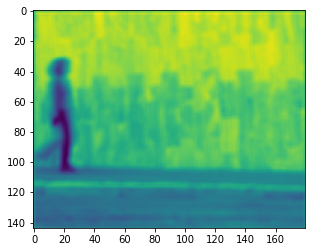

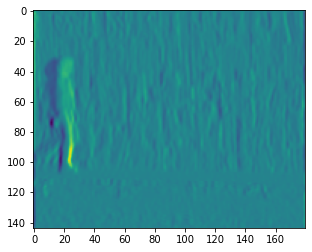

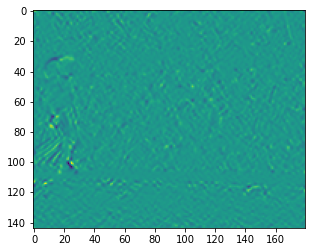

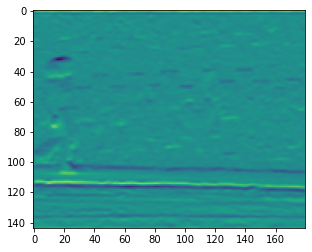

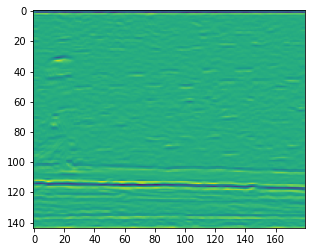

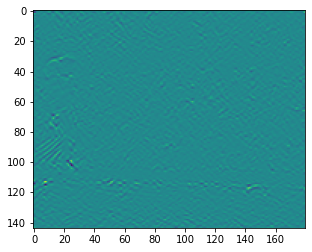

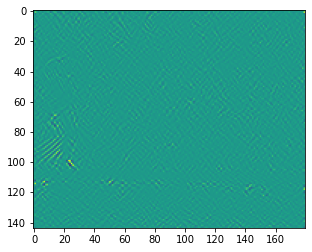

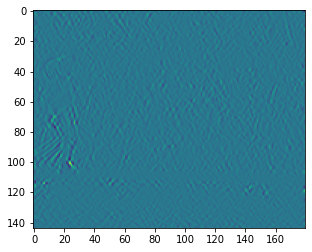

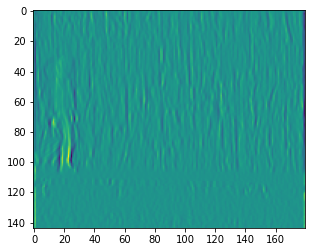

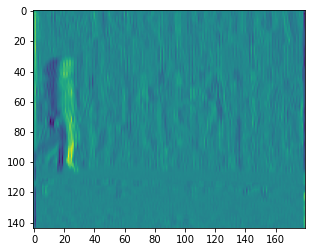

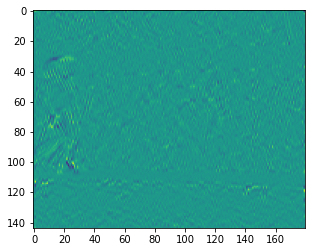

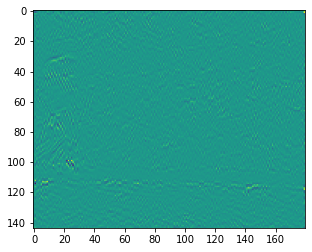

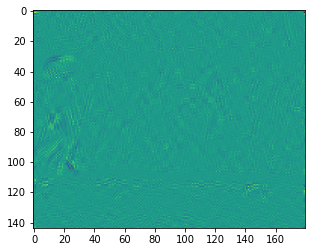

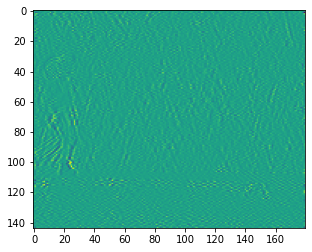

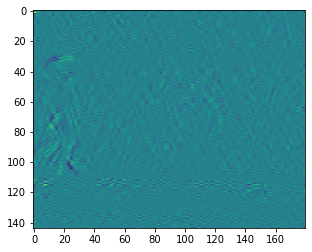

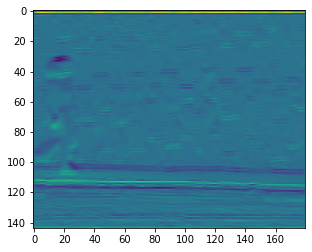

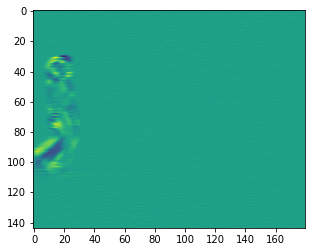

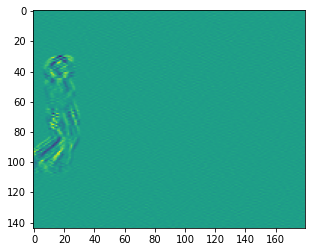

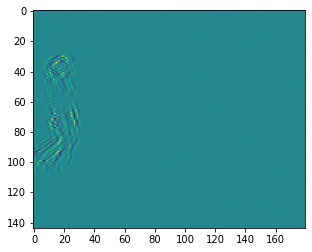

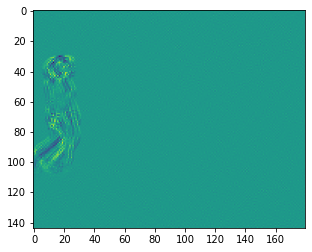

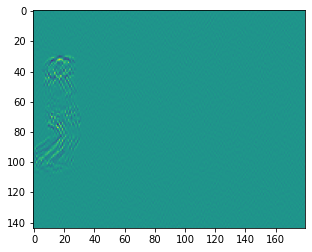

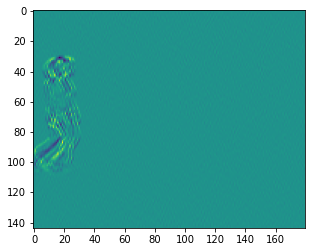

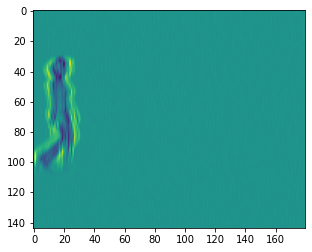

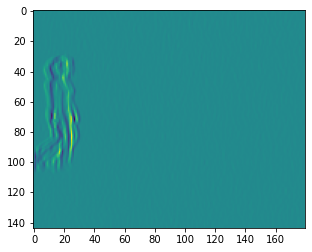

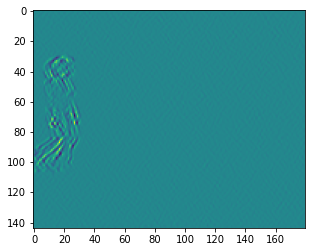

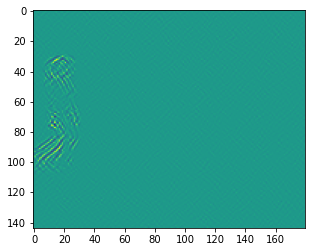

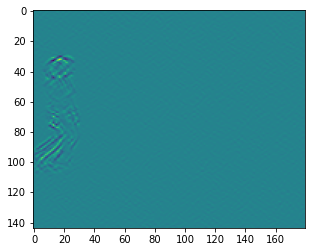

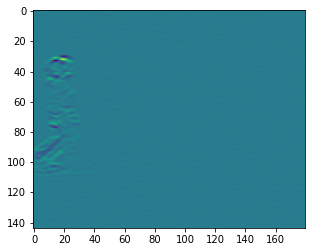

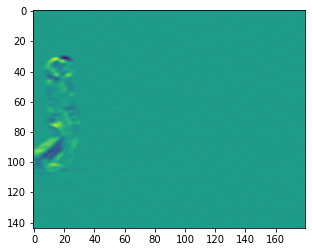

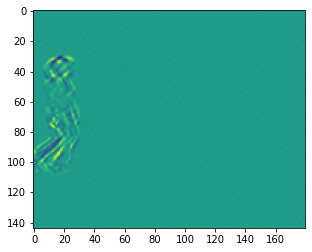

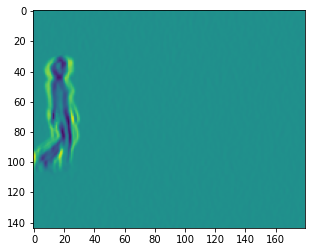

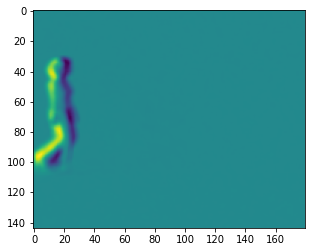

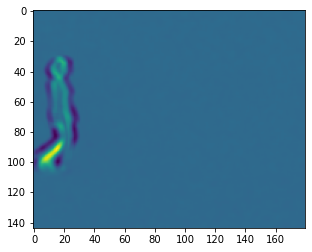

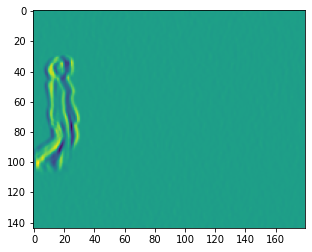

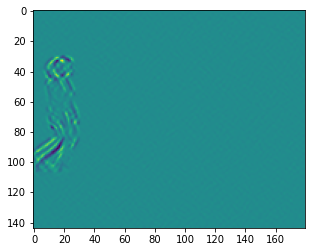

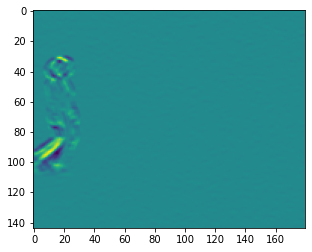

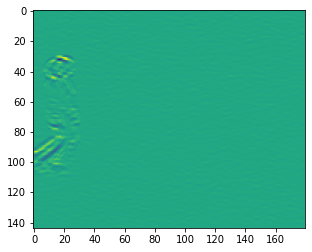

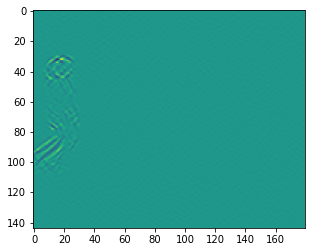

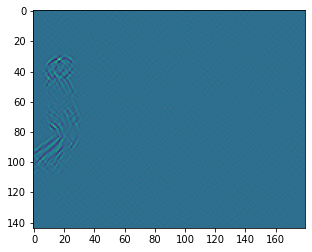

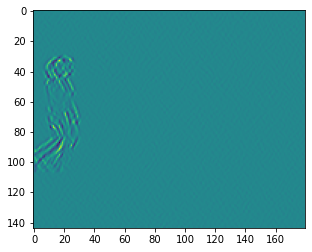

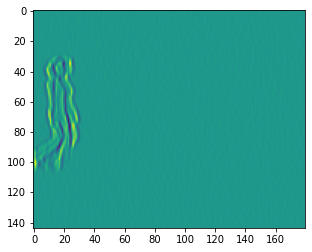

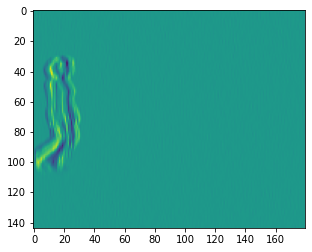

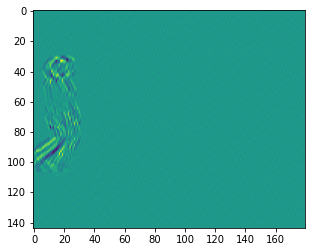

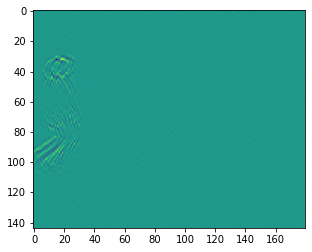

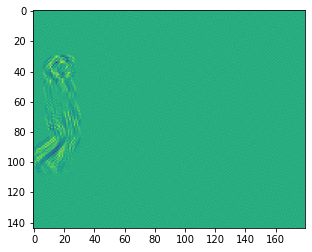

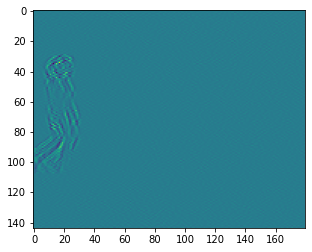

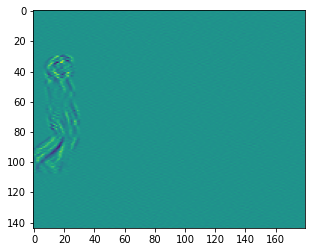

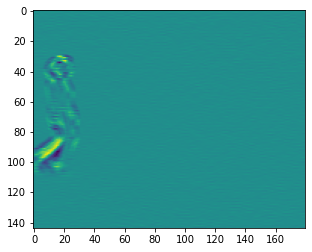

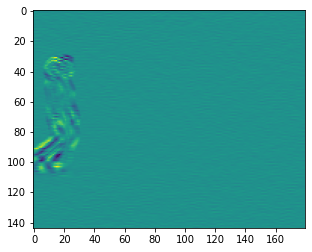

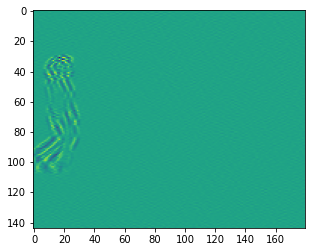

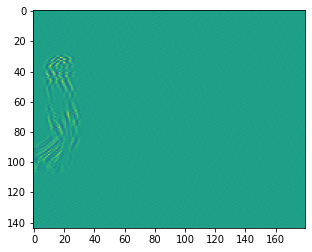

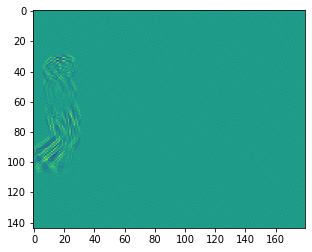

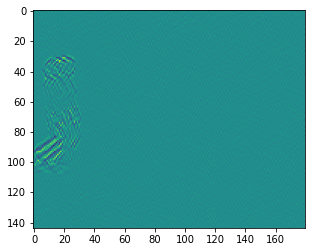

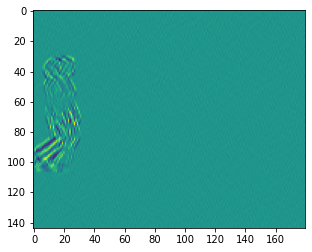

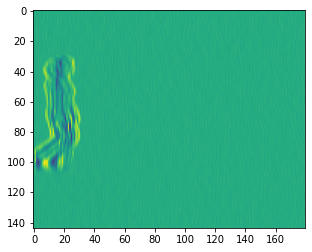

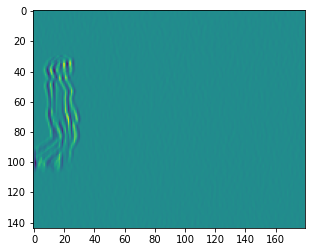

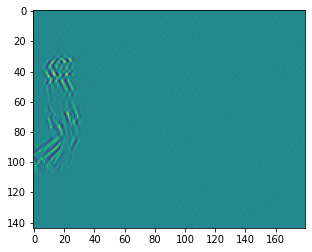

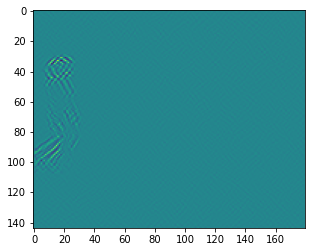

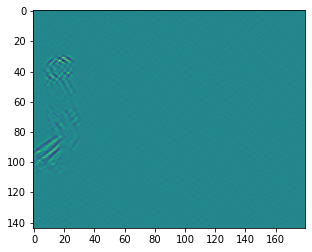

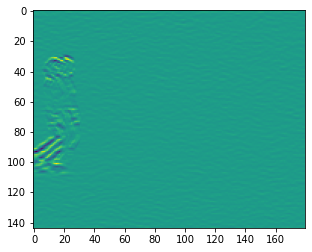

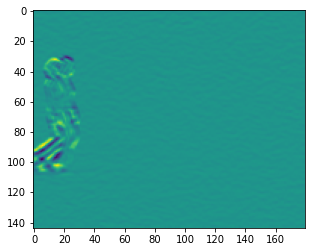

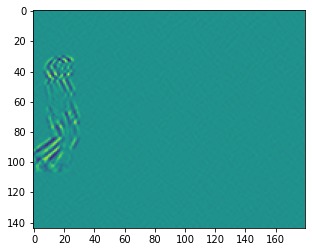

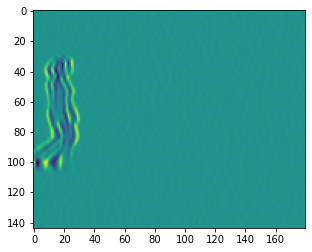

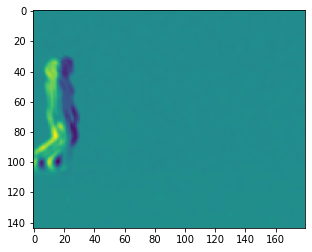

In [16]:
m,n,k = projections[0].shape
for j in range(k):
    img = projections[0][:,:,j]
    plt.imshow(img)
    plt.show()

In [17]:
sliced_projections = []

for p in projections:
    sliced_projections.append(p[:,:,32])

# plt.imshow(data[:,:,32])
# plt.show()
# data_003 = data_003[]
# data_004 = data_004[:,:,32]
sliced_projections = np.array(sliced_projections)

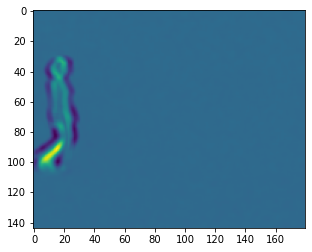

In [18]:
plt.imshow(sliced_projections[0])
plt.show()

In [7]:
# plot_3Dker(projections[0])

In [6]:
#parameters of the corner detection procedure
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
#window size is the first one
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

In [7]:
print(sliced_projections[0].shape)

(144, 180)


In [8]:
# m, n = sliced_projections[0].shape
# img1 = np.reshape(sliced_projections[0], (m,n,1))
# img2 = np.reshape(sliced_projections[1], (m,n,1))

<class 'numpy.float32'>
(144, 180)


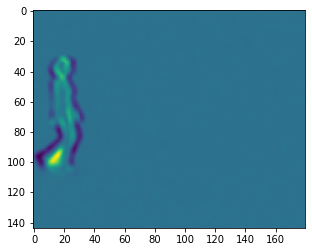

In [19]:
_img1 = cv2.cvtColor(sliced_projections[0].astype('float32'), cv2.IMREAD_COLOR)
_img2 = cv2.cvtColor(sliced_projections[1].astype('float32'), cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(_img2, cv2.COLOR_BGR2GRAY)
print(type(img2[0,0]))
print((img2.shape))

plt.imshow(img2)
plt.show()
# flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 2, 3, 15, 3, 5, 1.2, 0)
flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


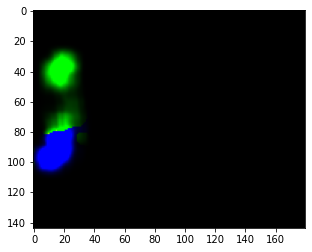

In [20]:
hsv = np.zeros_like(_img1)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,5,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

plt.imshow(rgb)
plt.show()
# cv2.imshow('frame2',)

In [40]:
# img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
# opencvImage = cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2GRAY)
# img1 = cv2.imdecode(np.uint8(img1), 0)
# img1= cv2.imread(img1,cv2.IMREAD_GRAYSCALE)
# img1 = cv2.imread(img1, 0)
# img2 = cv2.imread(img2, 0)

img1 = np.clip(img1 * 255, 0, 255)
img1 = img1.astype(np.uint8)  # safe conversion

img2 = np.clip(img2 * 255, 0, 255)
img2 = img2.astype(np.uint8)  # safe conversion

p0 = cv2.goodFeaturesToTrack(img1, mask = None, **feature_params)
p1, st, err = cv2.calcOpticalFlowPyrLK(img1, img2, p0, None, **lk_params)

(7, 2)


<ipython-input-41-11c05fdc5172>:11: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  mask = cv2.line(mask, (a,b),(c,d), [255,255,0], 2)


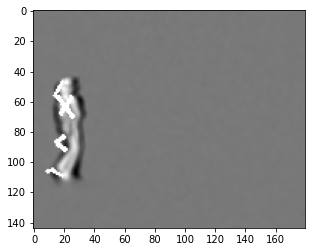

In [41]:
good_new = p1[st==1]
good_old = p0[st==1]
mask = np.zeros_like(img1)

print(good_old.shape)

for i,(new,old) in enumerate(zip(p1,p0)):
    a,b = new.ravel()
    
    c,d = old.ravel()
    mask = cv2.line(mask, (a,b),(c,d), [255,255,0], 2)

img2 = cv2.add(img2, mask)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [11]:
for i in range(0, m - b_s, b_s):
    for j in range(0, n - b_s, b_s):
        print(i, j)
#         print(i + b_s, j + b_s)
        _img = v_i[n_frame_after]
        cv2.circle(_img, (i, j), 5, (0,0,255), -1)
        plt.imshow(_img)
        plt.show()
    
    print("")

NameError: name 'm' is not defined

In [8]:
def Lucas_Kanade(im1, im2, window_size):
    
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])
   
    w = int(window_size/2) # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = im1 / 255. # normalize pixels
    I2g = im2 / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
       
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    
    for i in range(w, I1g.shape[0] - w):
        for j in range(w, I1g.shape[1] - w):
            #complete here
            #define and solve the linear system
            #remember the note about the ill-posed inversion in theory, look up pinv from numpy
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
            
            Ix = np.reshape(Ix, (Ix.shape[0], 1))
            Iy = np.reshape(Iy, (Iy.shape[0], 1))
            
            b = np.reshape(It, (It.shape[0], 1))
            A = np.hstack((Ix, Iy))
            
            nu = np.linalg.pinv(A).dot(b)
            
            u[i,j] = nu[0]
            v[i,j] = nu[1]
            
    return (u, v)

In [21]:
start = time.time()
window_size = 9 #adjust, select only odd values
[u,v] = Lucas_Kanade(sliced_projections[0], sliced_projections[1], window_size)
print("Elapsed time is",time.time()-start)

Elapsed time is 10.847004413604736


(144, 180)
(144, 180)


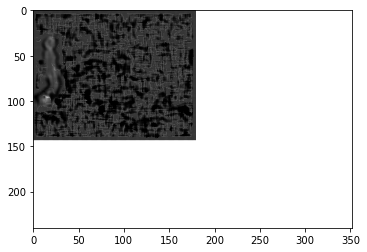

In [22]:
plt.imshow(cv2.cvtColor(sliced_projections[1].astype('float32'), cv2.COLOR_BGR2RGB)) #try plotting the motion vectors with and without the image in the background
print(u.shape)
print(v.shape)
xaxis = list(np.arange(sliced_projections[0].shape[0]))
yaxis = list(np.arange(sliced_projections[0].shape[1]))
plt.xlim(0, 352)
plt.ylim(240,0)
plt.quiver(u,v)

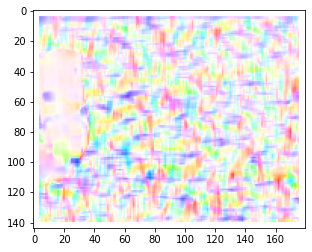

In [23]:
flow = np.stack([u,v],axis=2)
flow_rgb = flow_to_color(flow,convert_to_bgr=False)
plt.imshow(flow_rgb)

In [10]:
n_frame_after = 126
n_frame_before = 125

In [25]:
# block size
b_s = 50

m, n = data_003.shape

# i row index
# j col index

best_candidates = []
for i in range(0, m - b_s, b_s):
    
    e_i = i + b_s
    if (e_i >= m):
        e_i = m
        
        
    for j in range(0, n - b_s, b_s):
               
        e_j = j + b_s
        if (e_j >= n):
            e_j = n
            
#         print("i, j:\t\t", i, j)
#         print("e_i, e_j:\t", e_i, e_j)
                
        b_i_64 = data_004[i : e_i, j : e_j]
        
        v_r_63_pad = pad2D(data_003, b_s // 2)
        
#         plt.imshow(b_i_64, cmap='gray')
#         plt.show()

#         print("")
        
        candidates = []
        for u in range(i, i + b_s + 1, b_s):
            
            e_u = u + b_s
                
            for v in range(j, j + b_s + 1, b_s):
                
                e_v = v + b_s
                
                b_i_63 = v_r_63_pad[u : e_u, v : e_v]
                
#                 print("u, v:\t\t", u, v)
#                 print("e_u, e_v:\t", e_u, e_v)
                
#                 plt.imshow(b_i_63, cmap='gray')
#                 plt.show()

                
                norm = LA.norm(b_i_64 - b_i_63)
#                 print(norm)
                
                cand = Candidate(j, i, e_j, e_i, norm)
                candidates.append(cand)
        
#         print("")
        candidates.sort(key=lambda x: x.sad)
            
        best_candidates.append(candidates[0])
#         break

Candidate(x0=0, y0=50, x1=50, y1=100, sad=0.44812543754066675)


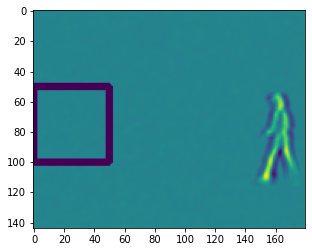

Candidate(x0=50, y0=50, x1=100, y1=100, sad=0.454094162509383)


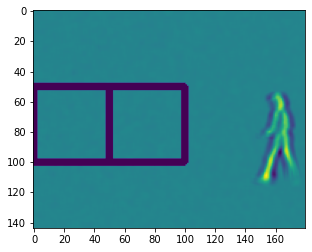

Candidate(x0=100, y0=0, x1=150, y1=50, sad=0.5010442761377616)


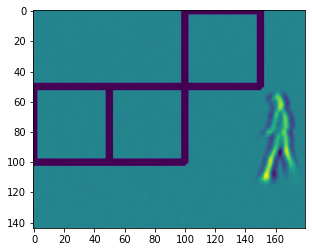

Candidate(x0=100, y0=50, x1=150, y1=100, sad=0.5187114255901469)


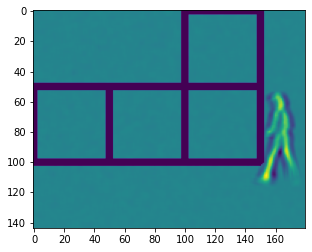

Candidate(x0=50, y0=0, x1=100, y1=50, sad=0.536755457682894)


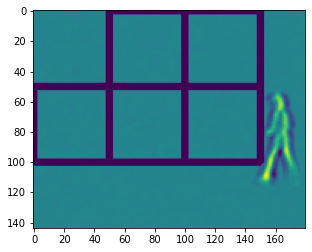

Candidate(x0=0, y0=0, x1=50, y1=50, sad=0.5519675100411437)


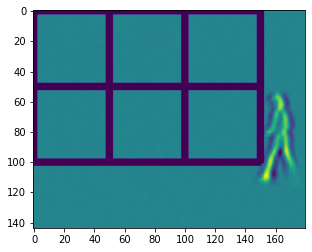

In [34]:
best_candidates.sort(key=lambda x: x.sad)
# print(best_candidates[0])

# _img = np.zeros(v_i[n_frame_after].shape)
# _img = cv2.imread('C:/Users/N/Desktop/monument.png')
# _img = data_003
_img = np.float32(data_003)
directory = "D:\\Informatica\\2020-2021\\COMPUTATIONAL VISION - 90539\\Progetto\\output\\"

j = 0
for i, k in enumerate (best_candidates):
    print(best_candidates[i])
    cv2.rectangle(_img,(best_candidates[i].x0, best_candidates[i].y0),(best_candidates[i].x1, best_candidates[i].y1), (0,255,0), 3)
#     _img = v_i[n_frame_after]
#     cv2.line(_img,
#             (best_candidates[i].x0, best_candidates[i].y0),
#             (best_candidates[i].x1, best_candidates[i].y1), (0,255,0), 3)
#     cv2.circle(_img, (best_candidates[i].x0, best_candidates[i].y0), 5, (0,0,255), -1)
#     cv2.circle(_img, (best_candidates[i].x1, best_candidates[i].y1), 5, (0,0,255), -1)
#     _img = cv2.imread('tennis_sif/i_126.jpeg')
#     cv2.rectangle(_img,
#                   (best_candidates[i].x0, best_candidates[i].y0),
#                   (best_candidates[i].x1, best_candidates[i].y1), (0,255,0), 3)
#     cv2.imwrite(directory + 'out_{}.jpeg'.format(j), _img)
    plt.imshow(_img)
    plt.show()
    j += 1

# cv2.imshow('window', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Image directory





In [ ]:
# for frame in v[:]:
#     plt.imshow(frame, cmap='gray')
#     plt.show()

In [ ]:
# def f(im1, im2, window_size):
    
#     kernel_x = np.array([[-1., 1.], [-1., 1.]])
#     kernel_y = np.array([[-1., -1.], [1., 1.]])
#     kernel_t = np.array([[1., 1.], [1., 1.]])
   
#     w = int(window_size/2) # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
#     I1g = im1 / 255. # normalize pixels
#     I2g = im2 / 255. # normalize pixels
#     # Implement Lucas Kanade
#     # for each point, calculate I_x, I_y, I_t
       
#     mode = 'same'
#     fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
#     fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
#     ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    
#     u = np.zeros(I1g.shape)
#     v = np.zeros(I1g.shape)
#     # within window window_size * window_size
    
#     for i in range(w, I1g.shape[0] - w):
#         for j in range(w, I1g.shape[1] - w):
#             #complete here
#             #define and solve the linear system
#             #remember the note about the ill-posed inversion in theory, look up pinv from numpy
#             Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
#             Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
#             It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
            
#             Ix = np.reshape(Ix, (Ix.shape[0], 1))
#             Iy = np.reshape(Iy, (Iy.shape[0], 1))
            
#             b = np.reshape(It, (It.shape[0], 1))
#             A = np.hstack((Ix, Iy))
            
#             nu = np.linalg.pinv(A).dot(b)
            
#             u[i,j] = nu[0]
#             v[i,j] = nu[1]
            
#     return (u, v)

In [ ]:
def f(im1, im2, window_size):
    
#     kernel_x = np.array([[-1., 1.],
#                          [-1., 1.]])
#     kernel_y = np.array([[-1., -1.],
#                          [1., 1.]])
#     kernel_t = np.array([[1., 1.],
#                          [1., 1.]])
    kernel_x = np.array([[1,1,1,1,1,1,1,1],
                         [1,1,1,1,-1,-1,-1,-1],
                         [1,1,-1,-1,-1,-1,1,1],
                         [1,1,-1,-1,1,1,-1,-1],
                         [1,-1,-1,1,1,-1,-1,1],
                         [1,-1,-1,1,-1,1,1,-1],
                         [1,-1,1,-1,-1,1,-1,1],
                         [1,-1,1,-1,1,-1,1,-1]])

#     kernel_x = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1],
# [1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1],
# [1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1],
# [1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1],
# [1,1,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1,-1,-1],
# [1,1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,-1,1,1],
# [1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1],
# [1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1],
# [1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1,1,-1],
# [1,-1,-1,1,-1,1,1,-1,-1,1,1,-1,1,-1,-1,1],
# [1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,1,1,-1],
# [1,-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,1],
# [1,-1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1],
# [1,-1,1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,-1,1],
# [1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1]])
    
    kernel_y = kernel_x.T
    
    kernel_t = np.ones((16,16))
    
   
    w = int(window_size/2) # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = im1 / 255. # normalize pixels
    I2g = im2 / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
       
    mode = 'same'
#     print(I1g)
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
#     print(fx)
#     return
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    
    for i in range(w, I1g.shape[0] - w):
        for j in range(w, I1g.shape[1] - w):
            #complete here
            #define and solve the linear system
            #remember the note about the ill-posed inversion in theory, look up pinv from numpy
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
            
            Ix = np.reshape(Ix, (Ix.shape[0], 1))
            Iy = np.reshape(Iy, (Iy.shape[0], 1))
            
            b = np.reshape(It, (It.shape[0], 1))
            A = np.hstack((Ix, Iy))
            
            nu = np.linalg.pinv(A).dot(b)
            
            u[i,j] = nu[0]
            v[i,j] = nu[1]
            
    return (u, v)